In [1]:
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#df = pd.read_csv("SOMENTE DADOS BRUTOS(NOVO).txt", encoding='utf-16')
df = pd.read_csv("data.txt", sep=',', header=None, names=['text','sentiment'])

In [3]:
df

,text,sentiment
0,RT @tirunjr: já pensou presentear sua tia quer...,#Feliz
1,já pensou presentear sua tia querida no amigo ...,#Feliz
2,RT @BTSONCHAT: nam: hoje no shopping com o ani...,#Feliz
3,Lindo Sabadoooo 🎀ECoracao #Hola #Sabado #Lind...,#Feliz
4,"Se um minuto do seu lado já me deixa #feliz, i...",#Feliz
...,...,...
11417,muito ruim ficar sem óculos #triste,#Triste
11418,#TRISTE | #RN Mulher morre após ser bal...,#Triste
11419,meu nenê ta bravo #triste,#Triste
11420,RT @crazycatladybr: O discurso de na saúde e n...,#Triste


In [4]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [5]:
df['sentiment'].unique() #amor e feliz = 1 , triste e chateado = -1

array(['#Feliz', '#Chateado', '#Inveja', '#Ironia', '#Raiva', '#Triste',
       '#Amor'], dtype=object)

In [6]:
df[df['sentiment'] == '#Inveja']

,text,sentiment
171,Aiiiii que ódioooo da Bruna Lombardi! ESorride...,#Inveja
172,Tem gente q a vontade é perguntar: vc imaginav...,#Inveja
173,Tá todo mundo pulando de bungee jump hj... tbe...,#Inveja
174,@T7agoxOficial Mano tu n gostas pk es hater e ...,#Inveja
175,RT @IPompermayer: @guszavo @EuRobo36 @cartamai...,#Inveja
...,...,...
11152,"A melhor forma de calar #fofoca , #inveja, #vi...",#Inveja
11153,Fizeram uma lista na escola da minha irmã e el...,#Inveja
11154,"@umeoitentae1 @manodevitto Fofa, fica meio est...",#Inveja
11155,"Não precisa ter muito , nego #Inveja até o pou...",#Inveja


In [7]:
df_remove = df[df['sentiment'] == '#Inveja'].index
df = df.drop(df_remove)

df_remove = df[df['sentiment'] == '#Raiva'].index
df = df.drop(df_remove)

df_remove = df[df['sentiment'] == '#Ironia'].index
df = df.drop(df_remove)

In [8]:
df

,text,sentiment
0,RT @tirunjr: já pensou presentear sua tia quer...,#Feliz
1,já pensou presentear sua tia querida no amigo ...,#Feliz
2,RT @BTSONCHAT: nam: hoje no shopping com o ani...,#Feliz
3,Lindo Sabadoooo 🎀ECoracao #Hola #Sabado #Lind...,#Feliz
4,"Se um minuto do seu lado já me deixa #feliz, i...",#Feliz
...,...,...
11417,muito ruim ficar sem óculos #triste,#Triste
11418,#TRISTE | #RN Mulher morre após ser bal...,#Triste
11419,meu nenê ta bravo #triste,#Triste
11420,RT @crazycatladybr: O discurso de na saúde e n...,#Triste


In [9]:
df['sentiment'].unique()

array(['#Feliz', '#Chateado', '#Triste', '#Amor'], dtype=object)

In [10]:
def binario(termo):
    if termo == '#Feliz' or termo == '#Amor':
        return 1
    elif termo == '#Triste' or termo == '#Chateado':
        return 0       
    
df['sentiment'] = df['sentiment'].apply(binario)

In [11]:
df['sentiment'].value_counts()

1    4720
0    4504
Name: sentiment, dtype: int64

In [12]:
def Tokenize(f):     ## Pre-processando a frase

    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','').replace('https','').replace('rt','').replace('rn','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):
    frase = re.sub('@\w+','',frase)
    frase = re.sub('{https}[^ ]+','',frase)
    frase = re.sub('https\w+','',frase)
    # re.sub('#\w+','',frase)
    return frase

def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [13]:
df['text'][9146]

'Isso lembrou tanto a gente. Valeu, foi bom demais enquanto durou, e sei que o nosso sentimento foi verdadeiro e gos… {https}://t.co/2naG1Ussu1'

In [14]:
remove_user(df['text'][9146])

'Isso lembrou tanto a gente. Valeu, foi bom demais enquanto durou, e sei que o nosso sentimento foi verdadeiro e gos… '

In [15]:
Tokenize(remove_user(df['text'][9146]))

'lembrou tanto gente valeu bom demais enquanto durou sei sentimento verdadeiro gos'

In [16]:
df['text'] = df['text'].apply(remove_user)
df['text'] = df['text'].apply(Tokenize)

In [17]:
df

,text,sentiment
0,pensou presentear tia querida amigo secreto de...,1
1,pensou presentear tia querida amigo secreto de...,1
2,nam hoje shopping aniversariante jungkook feli...,1
3,lindo sabadoooo ecoracaohola sabado lindodia f...,1
4,minuto lado deixa feliz imagine vida toda egri...,1
...,...,...
11417,ruim ficar óculos triste,0
11418,triste mulher morre após ser baleada pescoço e...,0
11419,nenê ta bravo triste,0
11420,discurso saúde doença td mentira 1 chance cai ...,0


In [18]:
text = df['text']
sentiment = np.asarray(df['sentiment'])


In [19]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(text)

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)
X.shape

(9224, 17314)

In [20]:
sentiment.shape

(9224,)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, sentiment, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train)
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1379
           1       0.96      0.90      0.93      1389

    accuracy                           0.93      2768
   macro avg       0.93      0.93      0.93      2768
weighted avg       0.93      0.93      0.93      2768



In [59]:
kf = KFold(n_splits=10)
clf = MultinomialNB()
lista = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
    
print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}  ')

0.9328277356446371
0.942578548212351
0.914409534127844
0.9100758396533044
0.920824295010846
0.9327548806941431
0.9370932754880694
0.928416485900217
0.8590021691973969
0.940347071583514
 Média: 0.9218329835512323 	 Std: 0.02330581054514923  


In [23]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, sentiment, test_size=0.3)

fit = model.fit(X_train.todense(), Y_train, epochs=5, validation_data=(X_test.todense(), Y_test))

Epoch 1/5
202/202 [==============================] - 2s 10ms/step - loss: 0.4180 - accuracy: 0.8293 - val_loss: 0.0961 - val_accuracy: 0.9693
Epoch 2/5
202/202 [==============================] - 1s 7ms/step - loss: 0.0557 - accuracy: 0.9873 - val_loss: 0.0629 - val_accuracy: 0.9769
Epoch 3/5
202/202 [==============================] - 2s 7ms/step - loss: 0.0147 - accuracy: 0.9985 - val_loss: 0.0638 - val_accuracy: 0.9765
Epoch 4/5
202/202 [==============================] - 1s 7ms/step - loss: 0.0080 - accuracy: 0.9997 - val_loss: 0.0714 - val_accuracy: 0.9765
Epoch 5/5
202/202 [==============================] - 2s 11ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0767 - val_accuracy: 0.9772


In [26]:
predicted = model.predict(X_test.todense())


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1375
           1       0.99      0.97      0.98      1393

    accuracy                           0.98      2768
   macro avg       0.98      0.98      0.98      2768
weighted avg       0.98      0.98      0.98      2768



In [27]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
    
    ])
    
    model.compile(
        optimizer='adam',
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train, epochs=5, validation_data=(X_test.todense(), y_test))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
260/260 [==============================] - 2s 8ms/step - loss: 0.3539 - accuracy: 0.8654 - val_loss: 0.0766 - val_accuracy: 0.9718
Epoch 2/5
260/260 [==============================] - 2s 7ms/step - loss: 0.0397 - accuracy: 0.9913 - val_loss: 0.0647 - val_accuracy: 0.9707
Epoch 3/5
260/260 [==============================] - 2s 7ms/step - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.0608 - val_accuracy: 0.9772
Epoch 4/5
260/260 [==============================] - 2s 6ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.0763 - val_accuracy: 0.9718
Epoch 5/5
260/260 [==============================] - 2s 7ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0705 - val_accuracy: 0.9783
 
Iter:  2
 
Epoch 1/5
260/260 [==============================] - 2s 7ms/step - loss: 0.3269 - accuracy: 0.8804 - val_loss: 0.0825 - val_accuracy: 0.9697
Epoch 2/5
260/260 [==============================] - 2s 6ms/step - loss: 0.0324 - accuracy: 0.9919 - val_loss: 0.0762 - val_accura

In [31]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    lista = []
    for i in range(len(matrix_acc)):
        lista.append(matrix_acc[i][-1])
        print(f' Fold: {i}\t Ultimo valor acc: {lista[i]}')
    print("")
    print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}')
        
media_std(val_accuracy) #arquitetura de cima

 Fold: 0	 Ultimo valor acc: 0.9783315062522888
 Fold: 1	 Ultimo valor acc: 0.9534127712249756
 Fold: 2	 Ultimo valor acc: 0.9512459635734558
 Fold: 3	 Ultimo valor acc: 0.9631636142730713
 Fold: 4	 Ultimo valor acc: 0.9739696383476257
 Fold: 5	 Ultimo valor acc: 0.9718004465103149
 Fold: 6	 Ultimo valor acc: 0.9663774371147156
 Fold: 7	 Ultimo valor acc: 0.9555314779281616
 Fold: 8	 Ultimo valor acc: 0.9219089150428772
 Fold: 9	 Ultimo valor acc: 0.9685466289520264

 Média: 0.9604288399219513 	 Std: 0.01543779331177531


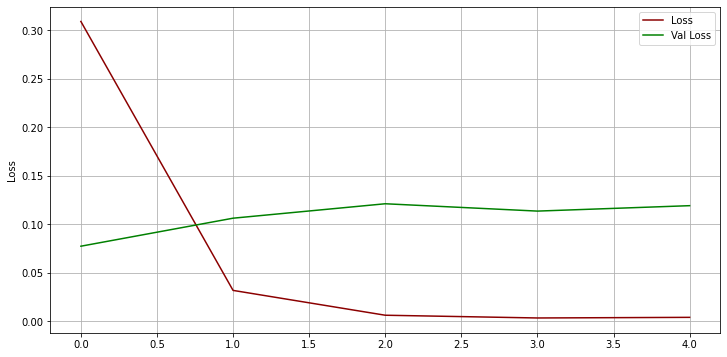

In [32]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

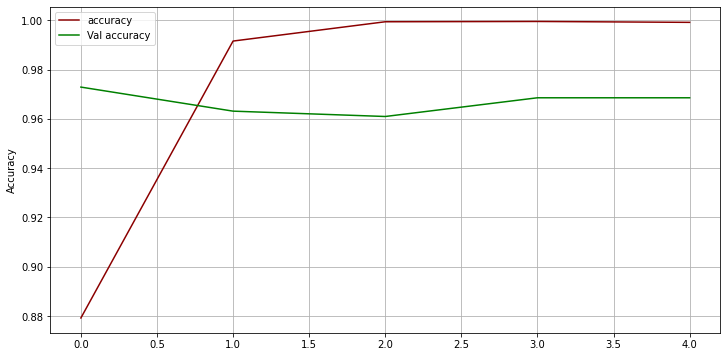

In [33]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [34]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df['text'])))

vocab = set_array(df['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [35]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], sentiment, test_size=0.3)

In [37]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=128 ,validation_data=(X_test, Y_test)) 

Epoch 1/5
51/51 [==============================] - 12s 240ms/step - loss: 0.6879 - accuracy: 0.5104 - val_loss: 0.6627 - val_accuracy: 0.5170
Epoch 2/5
51/51 [==============================] - 10s 192ms/step - loss: 0.5184 - accuracy: 0.7618 - val_loss: 0.4562 - val_accuracy: 0.8085
Epoch 3/5
51/51 [==============================] - 10s 188ms/step - loss: 0.2978 - accuracy: 0.9081 - val_loss: 0.4107 - val_accuracy: 0.8400
Epoch 4/5
51/51 [==============================] - 10s 189ms/step - loss: 0.1960 - accuracy: 0.9450 - val_loss: 0.3766 - val_accuracy: 0.8671
Epoch 5/5
51/51 [==============================] - 10s 188ms/step - loss: 0.1322 - accuracy: 0.9661 - val_loss: 0.3414 - val_accuracy: 0.8772


In [38]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1344
           1       0.89      0.87      0.88      1424

    accuracy                           0.88      2768
   macro avg       0.88      0.88      0.88      2768
weighted avg       0.88      0.88      0.88      2768



In [39]:
Tweet_preprocessed = np.asarray(pre_X(df['text']))

In [40]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

Tweet_preprocessed = np.asarray(pre_X(df['text']))

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    ])


    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]

    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
65/65 [==============================] - 17s 261ms/step - loss: 0.6851 - accuracy: 0.5264 - val_loss: 0.6806 - val_accuracy: 0.3814
Epoch 2/5
65/65 [==============================] - 14s 213ms/step - loss: 0.4912 - accuracy: 0.7974 - val_loss: 0.4343 - val_accuracy: 0.8570
Epoch 3/5
65/65 [==============================] - 14s 217ms/step - loss: 0.2850 - accuracy: 0.9133 - val_loss: 0.4102 - val_accuracy: 0.8689
Epoch 4/5
65/65 [==============================] - 13s 205ms/step - loss: 0.1819 - accuracy: 0.9492 - val_loss: 0.3567 - val_accuracy: 0.8754
Epoch 5/5
65/65 [==============================] - 13s 203ms/step - loss: 0.1226 - accuracy: 0.9666 - val_loss: 0.3323 - val_accuracy: 0.8808
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 18s 274ms/step - loss: 0.6840 - accuracy: 0.5243 - val_loss: 0.6774 - val_accuracy: 0.3965
Epoch 2/5
65/65 [==============================] - 14s 222ms/step - loss: 0.4693 - accuracy: 0.8016 - val_loss: 0.5625 - val

In [41]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.8808233737945557
 Fold: 1	 Ultimo valor acc: 0.8602383732795715
 Fold: 2	 Ultimo valor acc: 0.8678222894668579
 Fold: 3	 Ultimo valor acc: 0.9133260846138
 Fold: 4	 Ultimo valor acc: 0.8741865754127502
 Fold: 5	 Ultimo valor acc: 0.839479386806488
 Fold: 6	 Ultimo valor acc: 0.8644251823425293
 Fold: 7	 Ultimo valor acc: 0.9175704717636108
 Fold: 8	 Ultimo valor acc: 0.8004338145256042
 Fold: 9	 Ultimo valor acc: 0.8915401101112366

 Média: 0.8709845662117004 	 Std: 0.032605409406393206


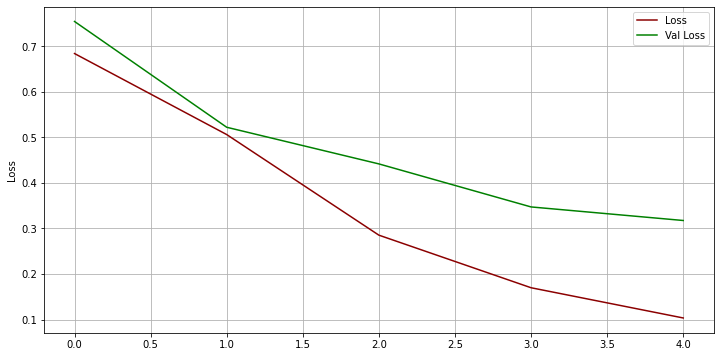

In [42]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

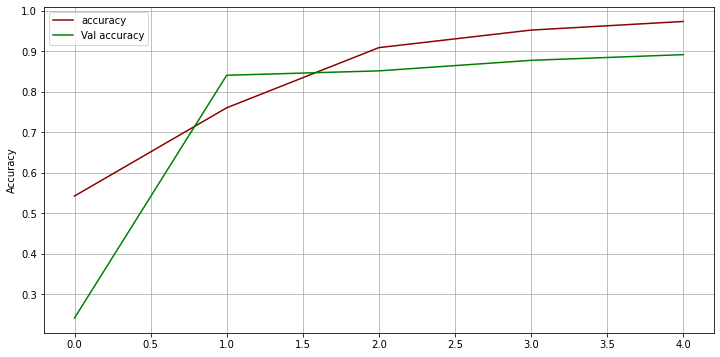

In [43]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [44]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, sentiment, test_size=0.3)


In [45]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=128 ,validation_data=(X_test, Y_test))

Epoch 1/5
51/51 [==============================] - 25s 487ms/step - loss: 0.5233 - accuracy: 0.7979 - val_loss: 0.1906 - val_accuracy: 0.9469
Epoch 2/5
51/51 [==============================] - 24s 472ms/step - loss: 0.0898 - accuracy: 0.9791 - val_loss: 0.1448 - val_accuracy: 0.9552
Epoch 3/5
51/51 [==============================] - 24s 478ms/step - loss: 0.0351 - accuracy: 0.9935 - val_loss: 0.1301 - val_accuracy: 0.9574
Epoch 4/5
51/51 [==============================] - 25s 481ms/step - loss: 0.0139 - accuracy: 0.9977 - val_loss: 0.1441 - val_accuracy: 0.9599
Epoch 5/5
51/51 [==============================] - 25s 481ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 0.1653 - val_accuracy: 0.9592


In [46]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1359
           1       0.95      0.97      0.96      1409

    accuracy                           0.96      2768
   macro avg       0.96      0.96      0.96      2768
weighted avg       0.96      0.96      0.96      2768



In [47]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
65/65 [==============================] - 31s 482ms/step - loss: 0.3942 - accuracy: 0.8445 - val_loss: 0.1296 - val_accuracy: 0.9686
Epoch 2/5
65/65 [==============================] - 30s 460ms/step - loss: 0.0525 - accuracy: 0.9876 - val_loss: 0.1176 - val_accuracy: 0.9675
Epoch 3/5
65/65 [==============================] - 30s 464ms/step - loss: 0.0186 - accuracy: 0.9958 - val_loss: 0.1414 - val_accuracy: 0.9621
Epoch 4/5
65/65 [==============================] - 30s 456ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.1417 - val_accuracy: 0.9632
Epoch 5/5
65/65 [==============================] - 30s 466ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1519 - val_accuracy: 0.9632
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 32s 495ms/step - loss: 0.4041 - accuracy: 0.8186 - val_loss: 0.1486 - val_accuracy: 0.9502
Epoch 2/5
65/65 [==============================] - 32s 487ms/step - loss: 0.0582 - accuracy: 0.9860 - val_loss: 0.1077 - val

In [48]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.9631636142730713
 Fold: 1	 Ultimo valor acc: 0.9490790963172913
 Fold: 2	 Ultimo valor acc: 0.9436619877815247
 Fold: 3	 Ultimo valor acc: 0.9599133133888245
 Fold: 4	 Ultimo valor acc: 0.9718004465103149
 Fold: 5	 Ultimo valor acc: 0.9598698616027832
 Fold: 6	 Ultimo valor acc: 0.9598698616027832
 Fold: 7	 Ultimo valor acc: 0.9566160440444946
 Fold: 8	 Ultimo valor acc: 0.9381778836250305
 Fold: 9	 Ultimo valor acc: 0.9544468522071838

 Média: 0.9556598961353302 	 Std: 0.00930389980611467


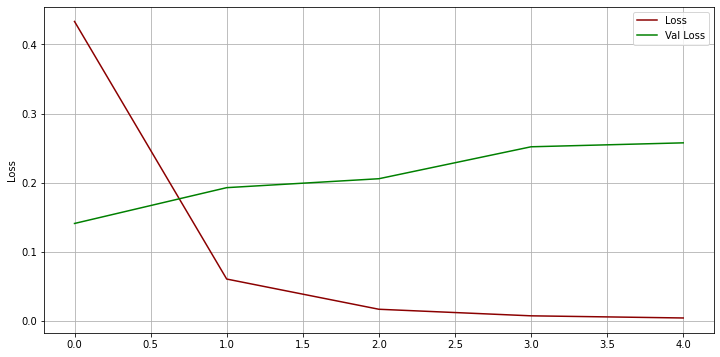

In [49]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

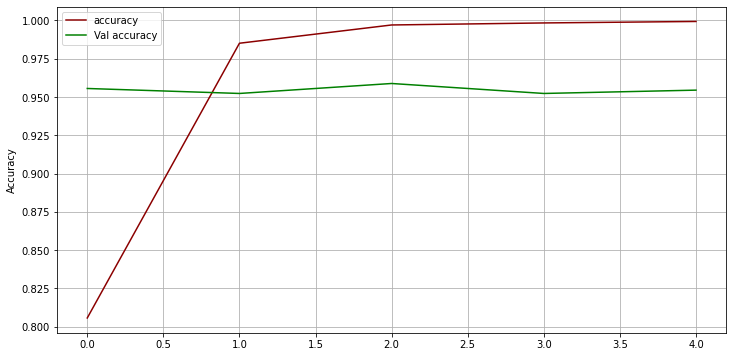

In [50]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [51]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, sentiment, test_size=0.3)


In [52]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=32 ,validation_data=(X_test, Y_test))

Epoch 1/5
202/202 [==============================] - 3s 16ms/step - loss: 0.3075 - accuracy: 0.8463 - val_loss: 0.1103 - val_accuracy: 0.9487
Epoch 2/5
202/202 [==============================] - 3s 15ms/step - loss: 0.0452 - accuracy: 0.9845 - val_loss: 0.1323 - val_accuracy: 0.9512
Epoch 3/5
202/202 [==============================] - 3s 15ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.1300 - val_accuracy: 0.9505
Epoch 4/5
202/202 [==============================] - 3s 16ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1342 - val_accuracy: 0.9541
Epoch 5/5
202/202 [==============================] - 3s 14ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1515 - val_accuracy: 0.9516


In [53]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1389
           1       0.94      0.97      0.95      1379

    accuracy                           0.95      2768
   macro avg       0.95      0.95      0.95      2768
weighted avg       0.95      0.95      0.95      2768



In [54]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
65/65 [==============================] - 2s 30ms/step - loss: 0.5778 - accuracy: 0.6996 - val_loss: 0.2840 - val_accuracy: 0.9112
Epoch 2/5
65/65 [==============================] - 2s 29ms/step - loss: 0.1114 - accuracy: 0.9640 - val_loss: 0.1073 - val_accuracy: 0.9610
Epoch 3/5
65/65 [==============================] - 2s 29ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0948 - val_accuracy: 0.9610
Epoch 4/5
65/65 [==============================] - 2s 29ms/step - loss: 0.0129 - accuracy: 0.9971 - val_loss: 0.1049 - val_accuracy: 0.9588
Epoch 5/5
65/65 [==============================] - 2s 28ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.1073 - val_accuracy: 0.9556
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 2s 29ms/step - loss: 0.5690 - accuracy: 0.7143 - val_loss: 0.3969 - val_accuracy: 0.8245
Epoch 2/5
65/65 [==============================] - 2s 27ms/step - loss: 0.1110 - accuracy: 0.9629 - val_loss: 0.1571 - val_accuracy: 0.9

In [55]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.9555796384811401
 Fold: 1	 Ultimo valor acc: 0.9425785541534424
 Fold: 2	 Ultimo valor acc: 0.9490790963172913
 Fold: 3	 Ultimo valor acc: 0.9566630721092224
 Fold: 4	 Ultimo valor acc: 0.9718004465103149
 Fold: 5	 Ultimo valor acc: 0.9566160440444946
 Fold: 6	 Ultimo valor acc: 0.952277660369873
 Fold: 7	 Ultimo valor acc: 0.9414316415786743
 Fold: 8	 Ultimo valor acc: 0.9577006697654724
 Fold: 9	 Ultimo valor acc: 0.9479392766952515

 Média: 0.9531666100025177 	 Std: 0.008320838500408857


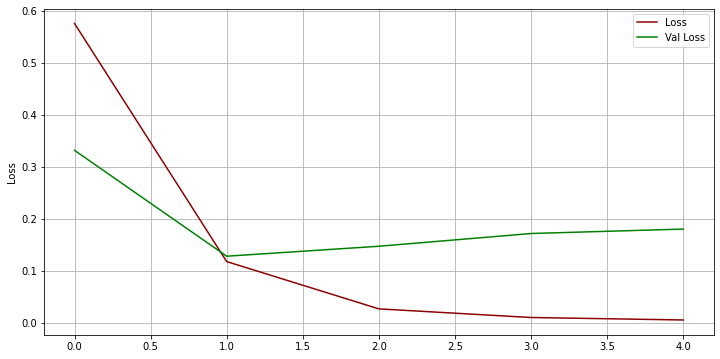

In [56]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

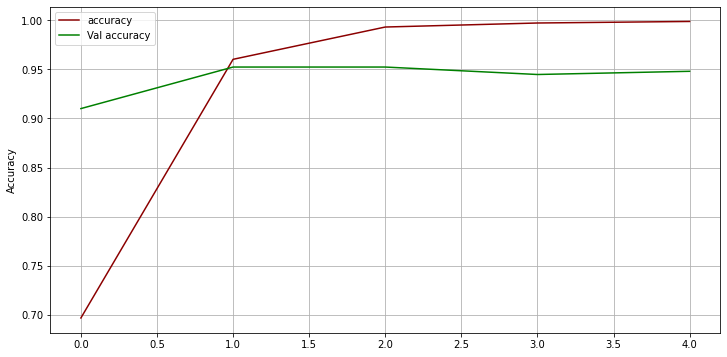

In [57]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()